MAE : 208,655 €
R² : 0.972


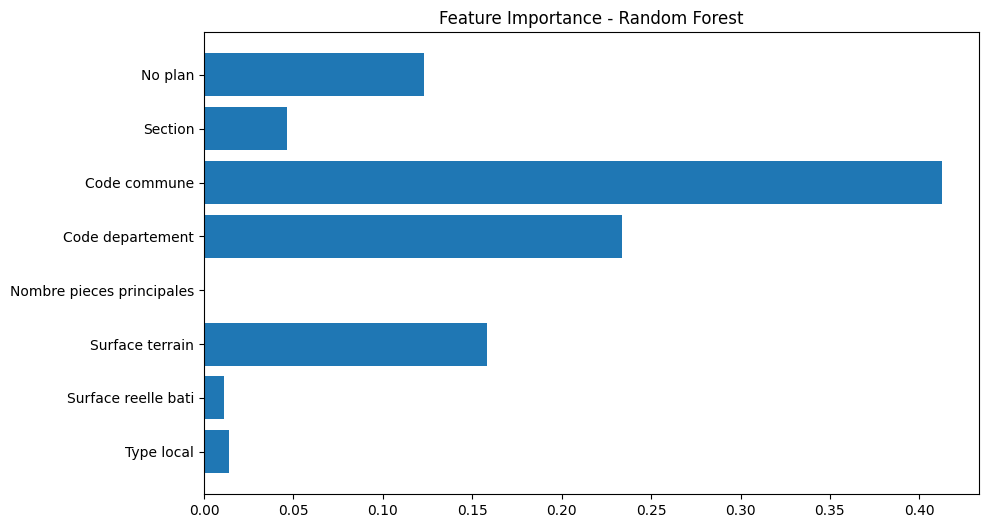

In [1]:
# ===============================
# 1️⃣ Imports
# ===============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ===============================
# 2️⃣ Charger le fichier DVF
# ===============================
df = pd.read_csv("ValeursFoncieres.txt", sep="|", header=0, dtype=str, low_memory=False)

# Colonnes utiles pour prédiction
cols = [
    "Code departement",
    "Code commune",
    "Section",
    "No plan",
    "Type local",
    "Surface reelle bati",
    "Surface terrain",
    "Nombre pieces principales",
    "Valeur fonciere"
]

df_model = df[cols].copy()

# Convertir numériques
df_model["Surface reelle bati"] = pd.to_numeric(df_model["Surface reelle bati"], errors="coerce")
df_model["Surface terrain"] = pd.to_numeric(df_model["Surface terrain"], errors="coerce")
df_model["Nombre pieces principales"] = pd.to_numeric(df_model["Nombre pieces principales"], errors="coerce")
df_model["Valeur fonciere"] = pd.to_numeric(df_model["Valeur fonciere"].str.replace(",", "."), errors="coerce")

# Supprimer les lignes sans valeur
df_model = df_model.dropna(subset=["Valeur fonciere", "Type local", "Surface reelle bati"])

# ===============================
# 3️⃣ Encodage des variables catégorielles
# ===============================
le_type = LabelEncoder()
df_model["Type local"] = le_type.fit_transform(df_model["Type local"])

le_dept = LabelEncoder()
df_model["Code departement"] = le_dept.fit_transform(df_model["Code departement"])

le_commune = LabelEncoder()
df_model["Code commune"] = le_commune.fit_transform(df_model["Code commune"])

le_section = LabelEncoder()
df_model["Section"] = le_section.fit_transform(df_model["Section"].fillna(""))

# ===============================
# 4️⃣ Features et target
# ===============================
features = [
    "Type local",
    "Surface reelle bati",
    "Surface terrain",
    "Nombre pieces principales",
    "Code departement",
    "Code commune",
    "Section",
    "No plan"
]

X = df_model[features]
y = df_model["Valeur fonciere"]

# ===============================
# 5️⃣ Split train/test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 6️⃣ Random Forest Regressor
# ===============================
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# ===============================
# 7️⃣ Évaluation
# ===============================
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae:,.0f} €")
print(f"R² : {r2:.3f}")

# ===============================
# 8️⃣ Feature importance
# ===============================
import matplotlib.pyplot as plt

importances = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Feature Importance - Random Forest")
plt.show()




In [2]:
# Nouvelle maison DVF
# Ligne : 07/01/2025, Vente, 235000 €, 15 IMP 0149, DU CHATEAU D EAU, 1800, MEXIMIEUX, 01, 244, C, 1958, 1 Maison, 69 m², 3 pièces, S, 184

# Assurons-nous d'utiliser les mêmes LabelEncoder que pour l'entraînement
new_test2 = pd.DataFrame({
    "Type local": [le_type.transform(["Maison"])[0]],  # Type local encodé
    "Surface reelle bati": [69],
    "Surface terrain": [184],
    "Nombre pieces principales": [3],
    "Code departement": [le_dept.transform(["01"])[0]],
    "Code commune": [le_commune.transform(["244"])[0]],
    "Section": [le_section.transform(["C"])[0]],
    "No plan": [1958]
})

predicted_value2 = rf.predict(new_test2)[0]
print(f"💰 Valeur estimée : {predicted_value2:,.0f} €")


💰 Valeur estimée : 205,308 €
